In [55]:
#http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
import pandas as pd
import numpy as np
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
#print df_wine
#print df_wine.shape
df_wine.columns = [
'Class Label',
'Alcohol',
'Malic acid',
'Ash',
'Alcalinity of ash',  
'Magnesium',
'Total phenols',
'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity',
'Hue',
'OD280/OD315 of diluted wines',
'Proline',]
#df_wine

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X,y = df_wine.iloc[:,1:], df_wine.iloc[:,0]

X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
sc = StandardScaler()
#對原始數據標準化
x_train_std = sc.fit_transform(X_train)
x_test_std = sc.fit_transform(X_test)

#Co-variance
cov_mat = np.cov(x_train_std.T)

#Eigen-value,vector
eigen_val, eigen_vecs = np.linalg.eig(cov_mat) 

cov_mat = np.cov(x_train_std)
#print x_train_std
print 'Eigenvalues: \n', eigen_val
print 'Eigenvectors: \n', eigen_vecs



Eigenvalues: 
[ 4.80831621  2.60374779  1.37087288  0.89730848  0.89417853  0.61503055
  0.52428622  0.09986474  0.36400572  0.1628064   0.30351535  0.23651936
  0.22610515]
Eigenvectors: 
[[ 0.11764947 -0.48449198 -0.22676228  0.22167968 -0.0657581   0.29682743
   0.07792283 -0.02721779 -0.41894013  0.27473069 -0.34066068 -0.3700865
   0.21821592]
 [-0.27125589 -0.22537291  0.0915252  -0.05050596  0.4230611   0.51436621
  -0.55097414 -0.00456689 -0.07912341 -0.1424389   0.01798525  0.1616495
  -0.25406603]
 [-0.00287842 -0.37849214  0.56611151  0.18058454 -0.21551982  0.06167068
   0.10384847  0.15079088  0.23426669  0.00241752  0.36953189 -0.40176932
  -0.25886059]
 [-0.2187704  -0.00424088  0.66946119 -0.01259168  0.07601025 -0.06845273
   0.23091643 -0.11012603 -0.44673576  0.09095765 -0.12428073  0.35754592
   0.27702039]
 [ 0.11381354 -0.29832137  0.14770786 -0.75074129 -0.31956416 -0.1361768
  -0.287783   -0.04231645  0.10836262 -0.03558904 -0.28727815 -0.05168022
   0.09558769]

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [57]:
tot = sum(eigen_val)
var_exp = [(i/tot) for i in sorted(eigen_val,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

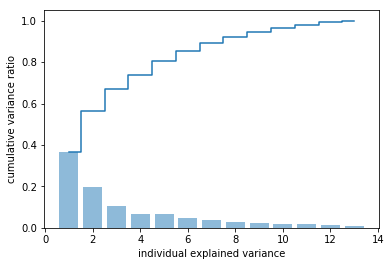

In [58]:
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative variance ratio')
plt.ylabel('cumulative variance ratio')
plt.xlabel('individual explained variance')
plt.show()

In [75]:
#特徵轉換
eigen_pairs = [(np.abs(eigen_val[i]), eigen_vecs[:,i]) for i in range(len(eigen_val))]
#print eigen_pairs
eigen_pairs.sort(reverse=True)
#eigen_paris = sorted(eigen_pairs,reverse=True)

#映射矩陣w......
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))

print w

[[ 0.11764947 -0.48449198]
 [-0.27125589 -0.22537291]
 [-0.00287842 -0.37849214]
 [-0.2187704  -0.00424088]
 [ 0.11381354 -0.29832137]
 [ 0.3883771  -0.08395627]
 [ 0.41798859 -0.03573104]
 [-0.30781073 -0.05530974]
 [ 0.31891453 -0.03466028]
 [-0.09956432 -0.51335364]
 [ 0.31677259  0.21549584]
 [ 0.38268756  0.13494201]
 [ 0.27026597 -0.37608379]]


In [60]:
x = np.arange(0,2,0.5)
valeur = 2*x

if valeur <= 0.6:
    print ("this works")
else:   
    print ("valeur is too high")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()